In [60]:
# import all the required libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [61]:
# storing the data into a df
df = pd.read_csv(r'C:\Users\agrand6\OneDrive - University of Illinois at Chicago\Code\CodeDumps\Shopify\data.csv', index_col="order_id")

In [62]:
df.head()

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
1,53,746,224,2,cash,2017-03-13 12:36:56
2,92,925,90,1,cash,2017-03-03 17:38:52
3,44,861,144,1,cash,2017-03-14 4:23:56
4,18,935,156,1,credit_card,2017-03-26 12:43:37
5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [63]:
# Checking for missing values
df.isna().sum()

shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   shop_id         5000 non-null   int64 
 1   user_id         5000 non-null   int64 
 2   order_amount    5000 non-null   int64 
 3   total_items     5000 non-null   int64 
 4   payment_method  5000 non-null   object
 5   created_at      5000 non-null   object
dtypes: int64(4), object(2)
memory usage: 273.4+ KB


In [65]:
df.shape

(5000, 6)

In [66]:
#Average order value for the dataset

np.mean(df['order_amount'])

3145.128

In [67]:
# Yep as we can see the mean of the order amount is abonrmally high for the sneakers. 
# In the total_items the items count is not equal to 1, so lets create a new column and find out

df['price_per_sneaker'] = df['order_amount']/ df['total_items']
np.mean(df['price_per_sneaker'])

387.7428

(array([4954.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          46.]),
 array([   90. ,  2653.5,  5217. ,  7780.5, 10344. , 12907.5, 15471. ,
        18034.5, 20598. , 23161.5, 25725. ]),
 <BarContainer object of 10 artists>)

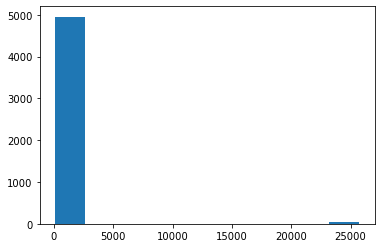

In [68]:
# 387 per sneaker still seems reasoanbly large.
# However, this value is much smaller than the 3k price per sneaker.
# Lets see the disstribution of the price and gain more insights

plt.hist(df['price_per_sneaker'])

In [69]:
# We can see there is still some sneakers which are priced abnromally high
# Digging deep to find out who are the culprits

df.sort_values(by='price_per_sneaker', ascending=False)

,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_sneaker
order_id,,,,,,,
4421,78,969,77175,3,debit,2017-03-09 15:21:35,25725.0
2907,78,817,77175,3,debit,2017-03-16 3:45:46,25725.0
4506,78,866,25725,1,debit,2017-03-22 22:06:01,25725.0
494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
2453,78,709,51450,2,cash,2017-03-27 11:04:04,25725.0
...,...,...,...,...,...,...,...
2715,92,905,180,2,cash,2017-03-15 17:02:28,90.0
3916,92,760,180,2,cash,2017-03-26 15:44:40,90.0
4761,92,937,90,1,debit,2017-03-20 7:37:28,90.0


In [70]:
# Lets groupby the shop_id to get price_per_sneaker at each store

temp = df.groupby(df['shop_id'])['price_per_sneaker'].mean()
temp.sort_values(ascending= False)

shop_id
78     25725.0
42       352.0
12       201.0
89       196.0
99       195.0
        ...   
53       112.0
100      111.0
32       101.0
2         94.0
92        90.0
Name: price_per_sneaker, Length: 100, dtype: float64

In [71]:
# We can see that store 78 is selling sneakers at $25,725
# Are the selling sneakers made of diamonds or gold?
# Lets drop the store 78, and get the average price_per_sneaker

np.mean(df[df['shop_id']!= 78]['price_per_sneaker'])

152.47557529269278

(array([4983.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          17.]),
 array([1.0000e+00, 2.0090e+02, 4.0080e+02, 6.0070e+02, 8.0060e+02,
        1.0005e+03, 1.2004e+03, 1.4003e+03, 1.6002e+03, 1.8001e+03,
        2.0000e+03]),
 <BarContainer object of 10 artists>)

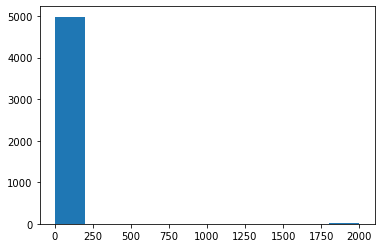

In [72]:
# Lets now look at the count of orders

plt.hist(df['total_items'])

In [73]:
#There is a shop with abnormally high number of orders, lets dig depper

df[df['total_items'] == 2000]['shop_id']

order_id
16      42
61      42
521     42
1105    42
1363    42
1437    42
1563    42
1603    42
2154    42
2298    42
2836    42
2970    42
3333    42
4057    42
4647    42
4869    42
4883    42
Name: shop_id, dtype: int64

In [74]:
# Lets explore the shop 42, and see if it doing any shady business practices

df.sort_values(by='total_items', ascending=False)

,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_sneaker
order_id,,,,,,,
2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00,352.0
521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
...,...,...,...,...,...,...,...
1409,16,807,156,1,cash,2017-03-07 4:04:28,156.0
3368,21,893,142,1,cash,2017-03-01 8:36:23,142.0
1411,97,832,162,1,debit,2017-03-13 4:40:51,162.0


In [75]:
# Here we can see that one person user_id = 607 bought many items though credit_card at shop 42 
# I belive this is anomaly in the data and we ahve to remove it since, one person cant buy 6k+ shoes at once

# Hence i am removing the shop 42 along with shop 78 from our dataset


final_df = df[(df['shop_id'] != 42) & (df['shop_id'] != 78)]

In [76]:
np.mean(final_df['price_per_sneaker'])

150.40016316540894

In [ ]:
# The final value is 150.4001, which is about 150.4 dollars. 
# This value is not different from 152.4, which we got by removing the shop_id = 78